In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
import csv
import datetime
import matplotlib.pyplot as plt

In [2]:
filename='ape_data.csv'
#'ape_data2.csv'

In [3]:
df = pd.read_csv(filename)
df =df.drop('Unnamed: 0',1)

In [171]:
df

,datetime,advertiser_bundle_id,creative_id,ad_id,app_id,bidadop_id,app_name,app_categories,publisher_name,device_idfa,...,model,country,city,language,impression,clicked,installed,app_type,weekday,hours
0,2015-05-18 05:59:29,4,1207663128,1136359960,1561033240,10271084,Wordly iPhone,"[""IAB1"", ""IAB9"", ""IAB9-30"", ""entertainment"", ""...","Scopely, Inc.",53521aa77c0d7b0750bcff2484fb7ea494be13cb,...,iPhone,USA,Crawfordsville,en,True,False,False,games,1,5
1,2015-05-16 05:36:08,4,1199274520,1136359960,61569562,10273094,iOS Word Search,"[""IAB1"", ""IAB9"", ""IAB9-30"", ""entertainment"", ""...",Kevin Tydlacka,caf7bc3bf37f31e1032c1f11dafe1e90a9716676,...,iPhone 6,USA,Springfield,en,True,False,False,games,6,5
2,2015-05-15 20:45:56,4,1204517400,1136359960,1755019792,10274110,NetTube for Youtube,"[""IAB1"", ""IAB1-6"", ""entertainment"", ""music""]",Mustafa Pehlivan,9dc2e71152280ba0824873478cf3ead956ed4ee8,...,iPod Touch 5G,USA,Corvallis,en,True,False,False,music,5,20
3,2015-05-15 01:47:45,4,1204517400,1136359960,1438349848,10274224,Apalabrados iOS,"[""IAB9"", ""IAB9-30"", ""games""]",Etermax,5bb1f53879d079f8333acf6089e1fa5ff59f7c5b,...,iPhone 6,USA,Owensboro,en,True,False,False,games,5,1
4,2015-05-17 23:47:22,4,1196128792,1136359960,2011920920,10275318,BHUG103 - Monster Dentistâ¢,"[""IAB9"", ""IAB9-30"", ""games""]",Bear Hug Media,d1d8f0a8f41ed12b669d0c8a5e99d14d8627d71f,...,iPhone,USA,Crystal Lake,en,True,False,False,games,7,23
5,2015-05-18 14:08:04,4,1197177368,1136359960,1645967896,10275660,Skeeball iPhone,"[""IAB1"", ""IAB9"", ""IAB9-30"", ""entertainment"", ""...","Scopely, Inc.",3c6b44d669e9ec8a7d181f5bfe45bcbddb9bddae,...,iPhone 5s (GSM),USA,Metairie,en,True,False,False,games,1,14
6,2015-05-18 00:23:10,4,1204517400,1136359960,2092661272,10275815,Bubble Galaxy with Buddies iPhone,"[""IAB1"", ""IAB9"", ""IAB9-30"", ""entertainment"", ""...","Scopely, Inc.",045dd58ec5430080f720a4091368dcca6c47e9db,...,iPhone,USA,Pleasanton,en,True,False,False,games,1,0
7,2015-05-15 16:39:21,4,1199274520,1136359960,1325103647,10275836,Cribbage Pro,"[""IAB9"", ""IAB9-30"", ""games""]","Fuller Systems, Inc.",0fc87a03a07227ff055259e2877256d253074ee5,...,iPhone 5s (GSM),CAN,QuÃ©bec,fr,True,False,False,games,5,16
8,2015-05-17 03:07:39,4,1202420248,1136359960,512457247,10276243,CSR Racing iOS,"[""IAB1"", ""IAB9"", ""IAB9-30"", ""entertainment"", ""...",NaturalMotion,8de62f21453ca921c0922d69f06c589dfda93aa8,...,iPhone 4S,CAN,MontrÃ©al,fr,True,False,False,games,7,3
9,2015-05-14 22:57:28,4,1204517400,1136359960,1438349848,10276421,Apalabrados iOS,"[""IAB9"", ""IAB9-30"", ""games""]",Etermax,714694b050726aded69231909e99a4ced0631619,...,iPhone 5s (GSM),CAN,Beauport,fr,True,False,False,games,4,22


In [4]:
df.groupby('installed').sum()

,advertiser_bundle_id,creative_id,ad_id,app_id,bidadop_id,impression,clicked,weekday,hours
installed,,,,,,,,,
False,6579120,1977015930375712,1849153296453152,1957392009373269,22754945755555,1644780,79782,7005115,20395292
True,3100,931825360552,871596203688,996310687639,10790830763,775,775,3433,9956


In [142]:
len(df['city'].unique())

11229

#### Impressions to install bar plot with relation to the days in a week

In [6]:
df.groupby(['weekday', 'hours']).sum();

In [7]:
df_filter = df[['weekday', 'hours', 'app_type', 'os', 'country', 'impression', 'clicked', 'installed']]

In [8]:
grouped_w=df.groupby('weekday')['impression','installed'].sum()

In [9]:
days=['Monday', 'Tuesday', 'Wednesday','Thursday','Friday', 'Saturday', 'Sunday']

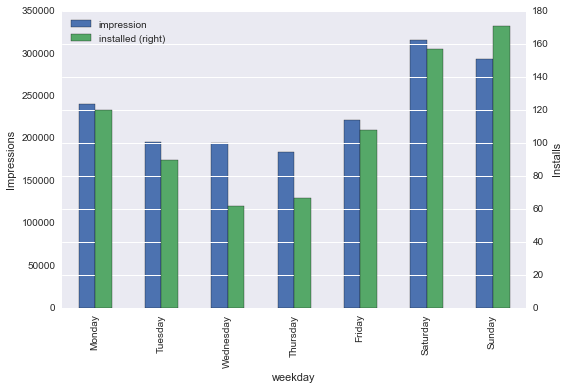

In [95]:
day_plot = grouped_w.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Installs_Daily.png', dpi=1000)

In [11]:
grouped_wCI=df.groupby('weekday')['clicked','installed'].sum()

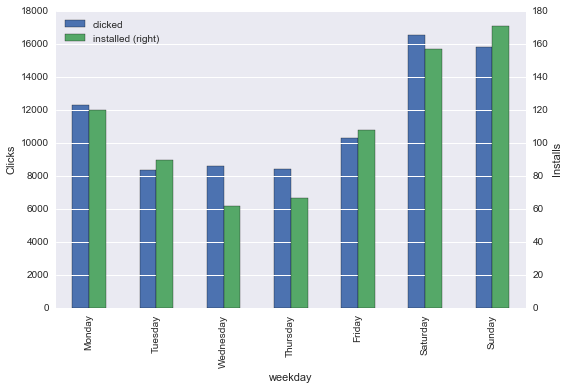

In [94]:
day_plot2 = grouped_wCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_w.index-1, days, rotation='vertical');
plt.ylabel('Installs');
day_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Daily.png', dpi=1000)

#### Install to impression bar plot comparison on a per hour basis

In [13]:
grouped_h=df.groupby('hours')['impression','installed'].sum()
grouped_hCI=df.groupby('hours')['clicked','installed'].sum()

In [14]:
hr_range=map(str, range(1,11 + 1))

In [15]:
hours=['12 am'] + hr_range + ['12 pm'] + hr_range

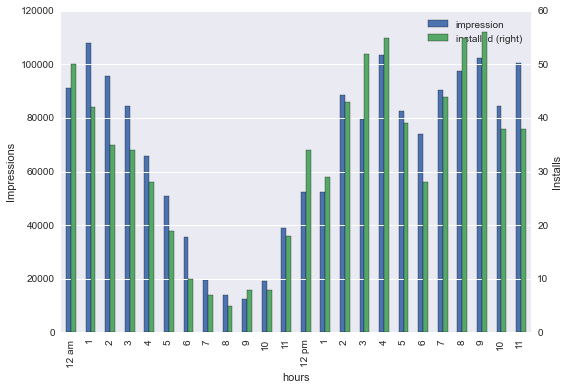

In [96]:
hr_plot = grouped_h.drop('ratio',1).plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_h.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot.set_ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impression_Installs_Hourly.png', dpi=1000)

In [79]:
grouped_h['ratio']=grouped_h['installed']/grouped_h['impression']*100

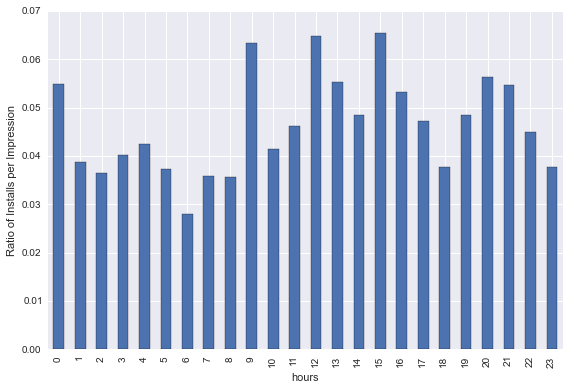

In [97]:
ratio_hr_plot = grouped_h['ratio'].plot(kind = 'bar')
ratio_hr_plot.set_ylabel('Ratio of Installs per Impression');
plt.tight_layout()
plt.savefig('Impressions_Installs_HourlyRatio.png', dpi=1000)

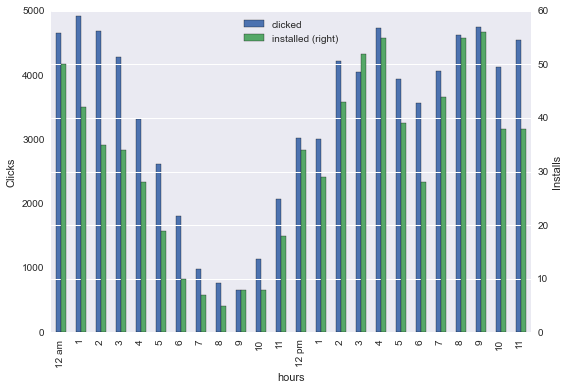

In [98]:
hr_plot2 = grouped_hCI.plot(kind='bar', secondary_y='installed')
plt.xticks(grouped_hCI.index, hours, rotation='vertical');
plt.ylabel('Installs');
hr_plot2.set_ylabel('Clicks');
plt.tight_layout()
plt.savefig('Click_Installs_Hourly.png', dpi=1000)

In [18]:
grouped_wh_Ins=df.groupby(['weekday', 'hours'])[['installed']].sum()

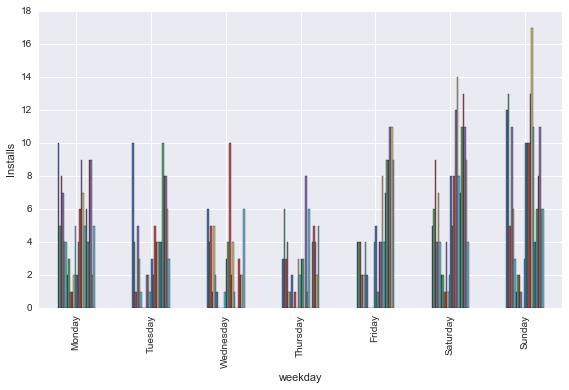

In [99]:
grouped_wh_Ins.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Ins.unstack().index-1, days, rotation='vertical');
plt.ylabel('Installs');
plt.tight_layout()
plt.savefig('Installs_Daily_Summary.png', dpi=1000)

In [20]:
grouped_wh_Imp=df.groupby(['weekday', 'hours'])[['impression']].sum()

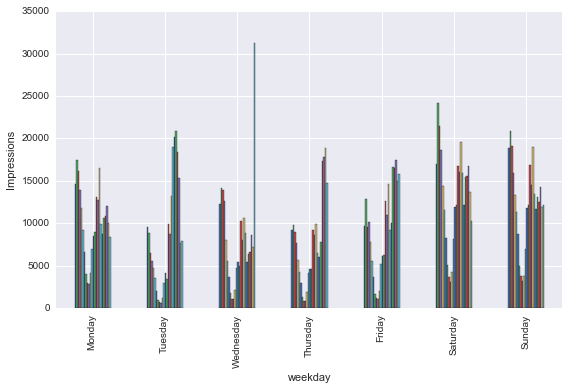

In [100]:
grouped_wh_Imp.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_Imp.unstack().index-1, days, rotation='vertical');
plt.ylabel('Impressions');
plt.tight_layout()
plt.savefig('Impressions_Daily_Summary.png', dpi=1000)

In [22]:
grouped_wh_C=df.groupby(['weekday', 'hours'])[['clicked']].sum()

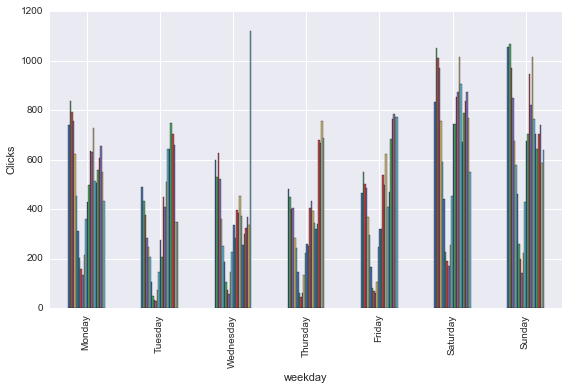

In [101]:
grouped_wh_C.unstack().plot(kind='bar', legend=False)
plt.xticks(grouped_wh_C.unstack().index-1, days, rotation='vertical');
plt.ylabel('Clicks');
plt.tight_layout()
plt.savefig('Clicks_Daily_Summary.png', dpi=1000)

In [70]:
cols_to_keep=['weekday','hours','impression','installed','clicked', 'app_type']
mini_df=df[cols_to_keep]

In [64]:
grouped_Imp_Ins_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'installed']].sum().reset_index()

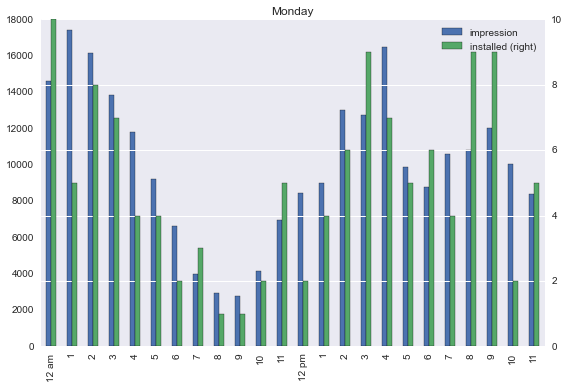

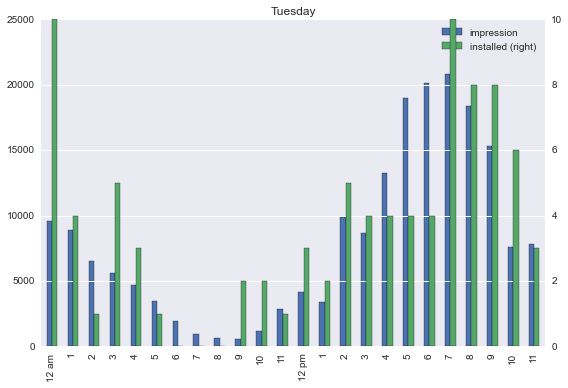

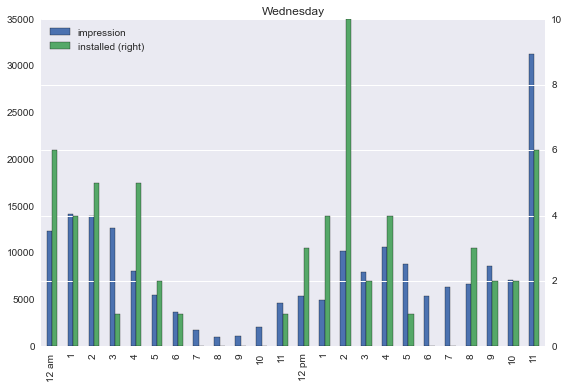

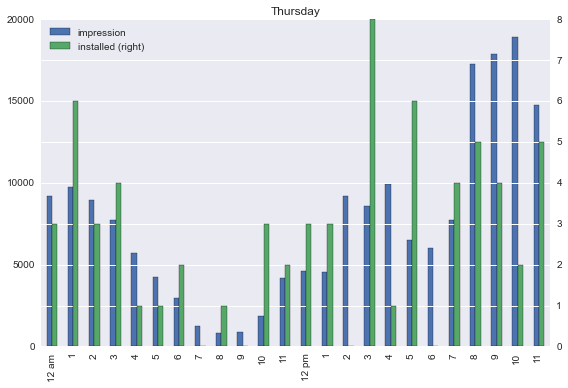

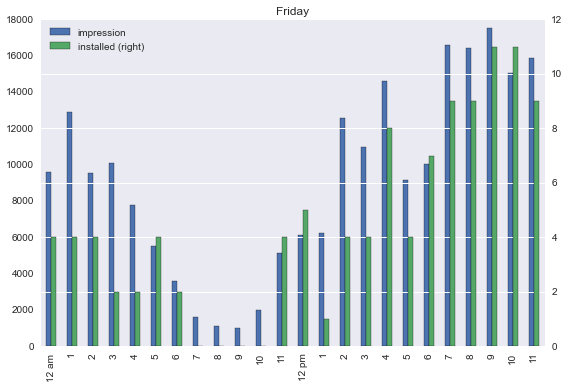

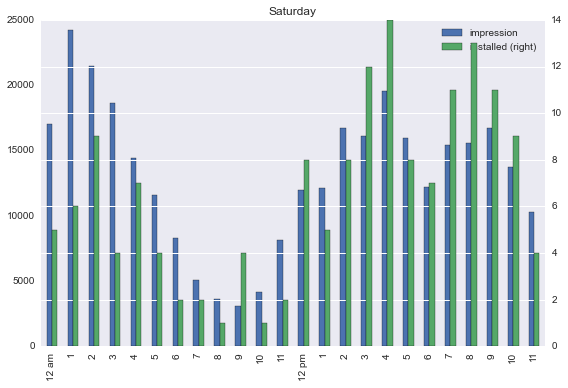

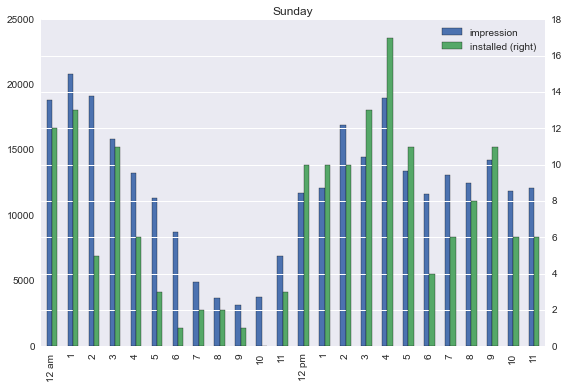

In [105]:
for i in range(1,8):
    plots= grouped_Imp_Ins_Daily[grouped_Imp_Ins_Daily['weekday']==i].drop(['weekday', 'hours'],1).plot(kind='bar', secondary_y='installed')
    plt.xticks(grouped_Imp_Ins_Daily['hours'], hours, rotation='vertical')
    plt.title(days[i-1])
    plt.tight_layout()
    plt.savefig('Impressions_Installs_Daily_'+str(days[i-1])+'.png', dpi=1000)
    

In [66]:
grouped_Imp_Cli_Daily=mini_df.groupby(['weekday', 'hours'])[['impression', 'clicked']].sum().reset_index()

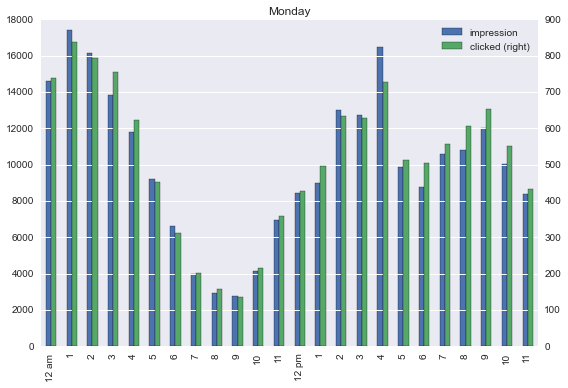

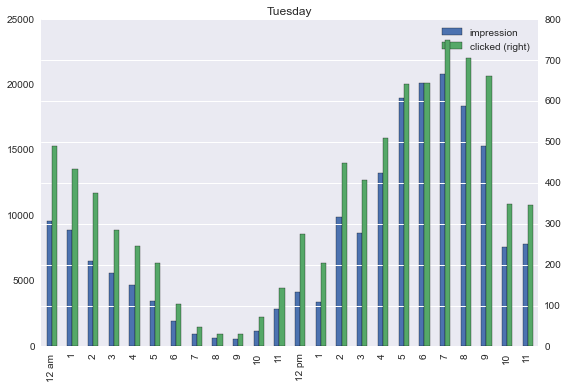

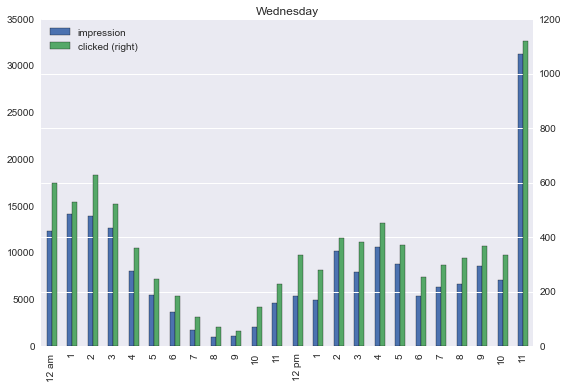

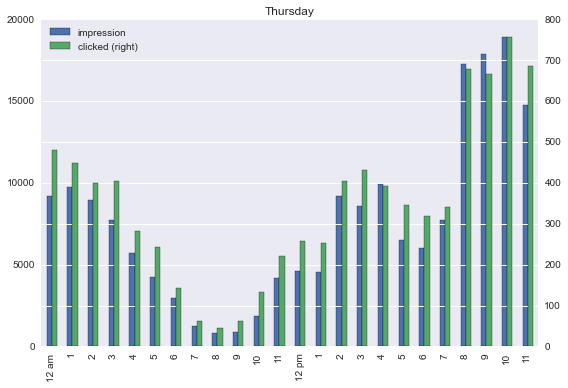

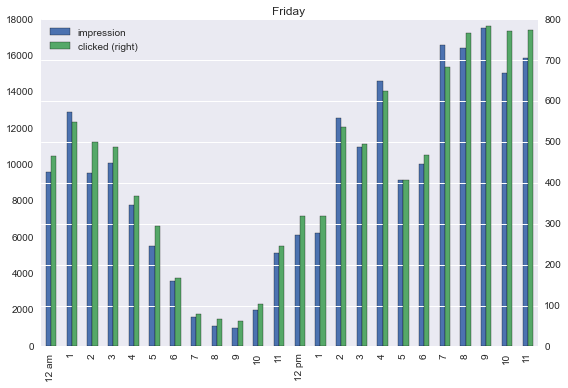

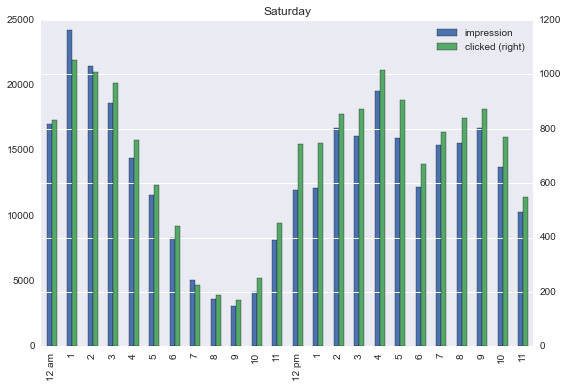

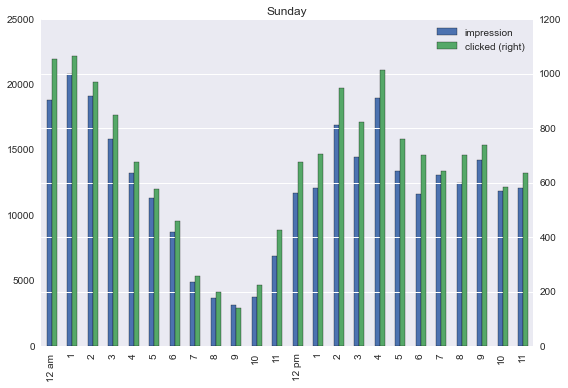

In [120]:
for i in range(1,8):
    plots= grouped_Imp_Cli_Daily[grouped_Imp_Cli_Daily['weekday']==i].drop(['weekday', 'hours'],1).plot(kind='bar', secondary_y='clicked')
    plt.xticks(grouped_Imp_Cli_Daily['hours'], hours, rotation='vertical')
    plt.title(days[i-1])
    plt.tight_layout()
    plt.savefig('Impressions_Installs_hourly_'+str(days[i-1])+'.png', dpi=1000)
  

In [119]:
app_type_index=grouped_cat_days['app_type'].unique()

#### Categorical Inspection

In [183]:
grouped_cat_days=mini_df.groupby(['app_type', 'weekday'])[['impression', 'clicked', 'installed']].sum().reset_index()

In [131]:
grouped_cat_days['ratio']=grouped_cat_days['clicked']/grouped_cat_days['impression']

In [178]:
grouped_cat_days.groupby('ratio').sum().reset_index();

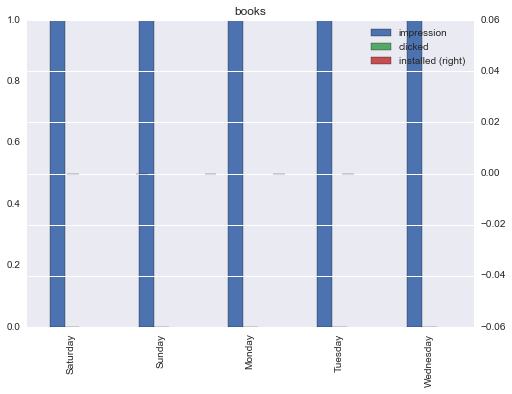

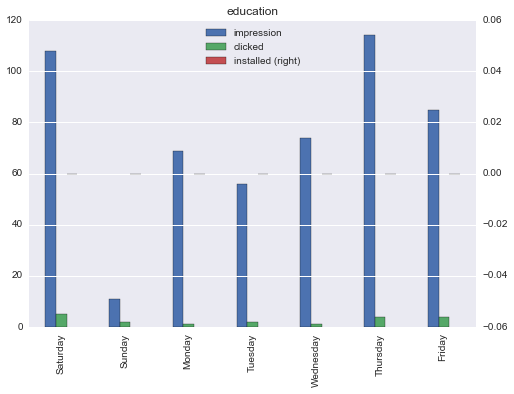

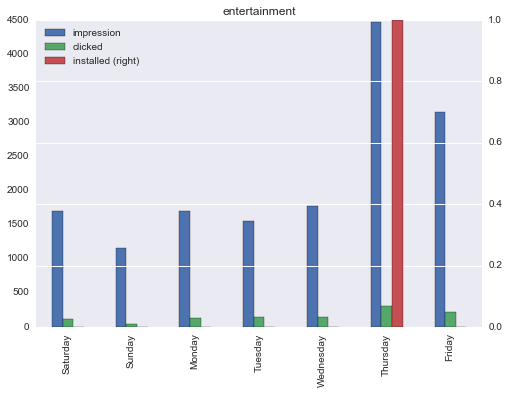

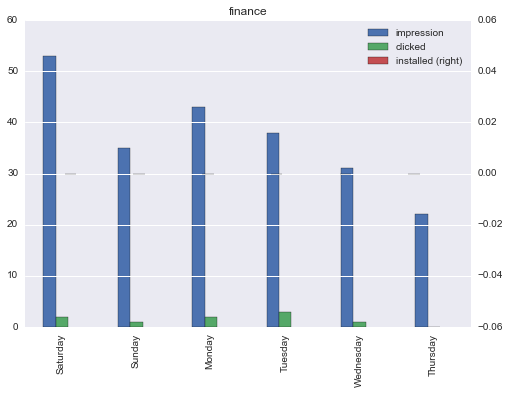

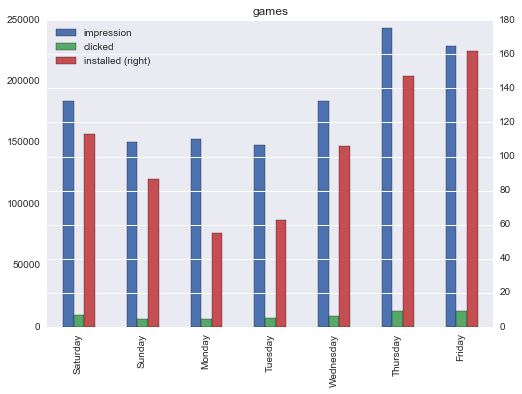

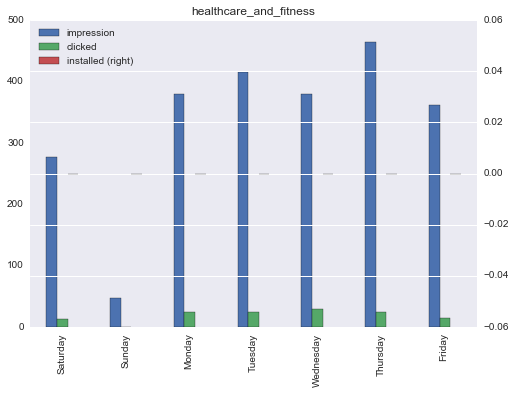

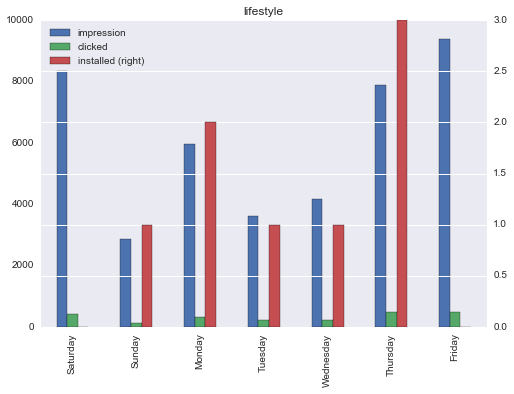

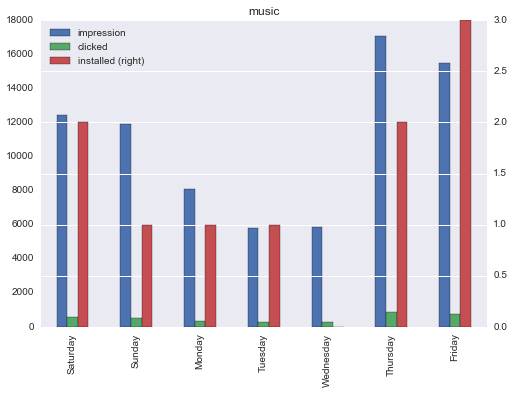

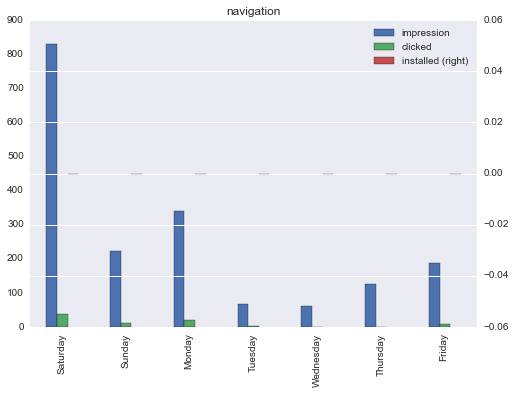

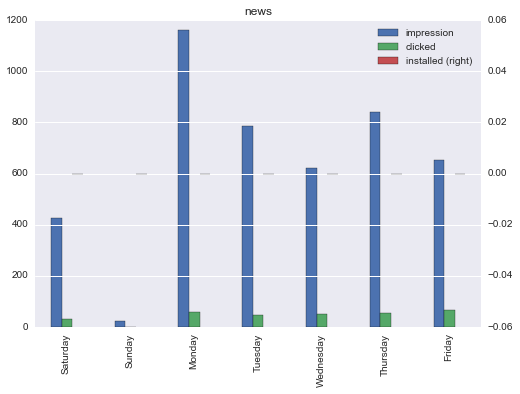

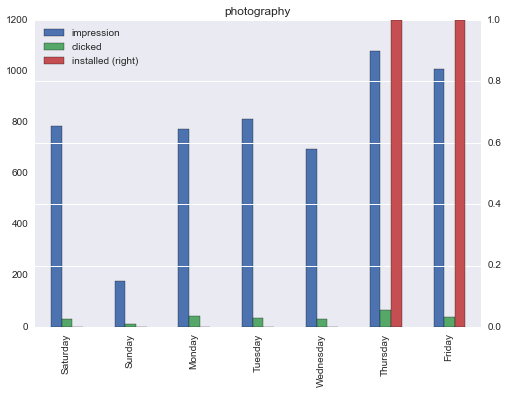

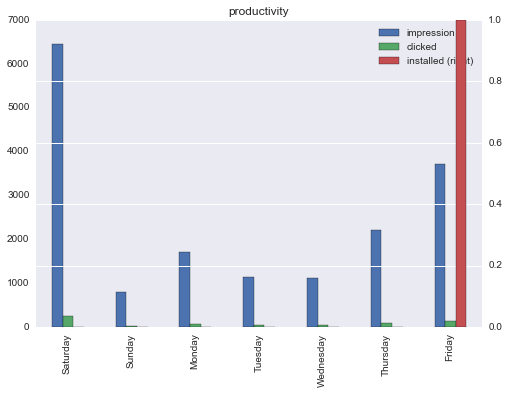

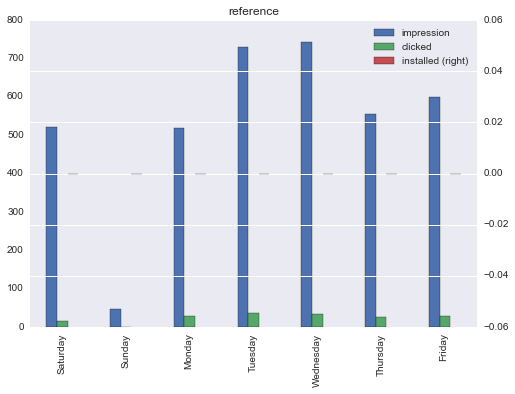

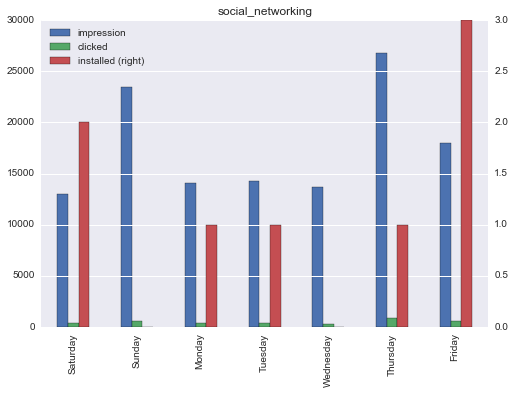

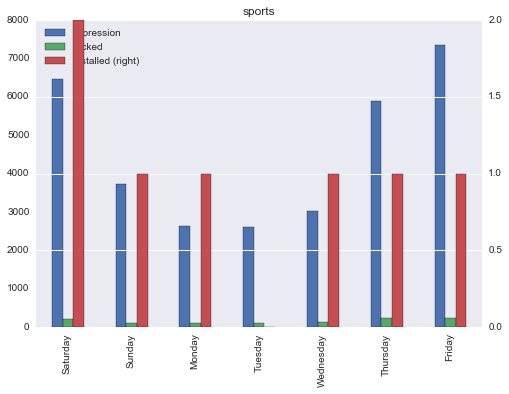

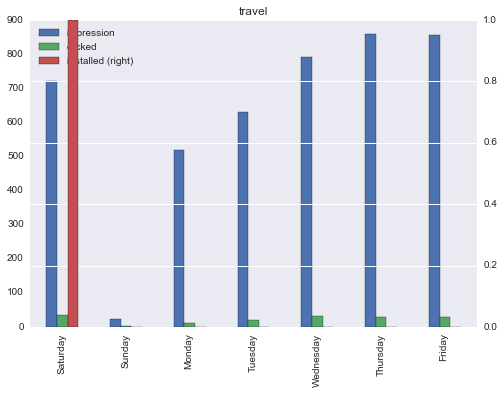

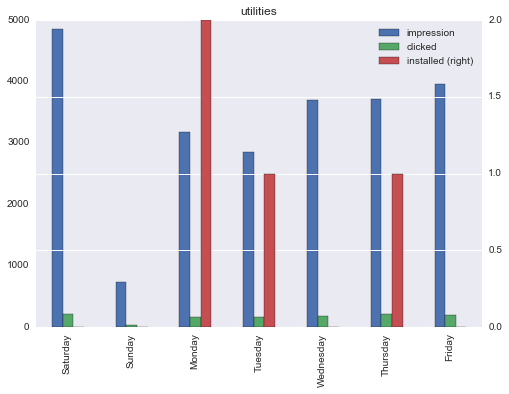

In [184]:
for i in range(1,len(app_type_index)):
    rotate=app_type_index[i-1]
    plots= grouped_cat_days[grouped_cat_days['app_type']== rotate].drop(['app_type','weekday'],1).plot(kind='bar', secondary_y='installed')
    plt.xticks(grouped_cat_days['weekday']-1, days, rotation='vertical')
    plt.title(app_type_index[i-1])

In [138]:
r_df=df[['impression','clicked','installed']]

In [146]:
df_city=df.groupby('city')['impression','clicked','installed'].sum()

In [149]:
df_city['clickedratio']=df_city['clicked']/df_city['impression']

In [156]:
df_city_index=df_city.index

ValueError: could not convert string to float: Ãle-perrot

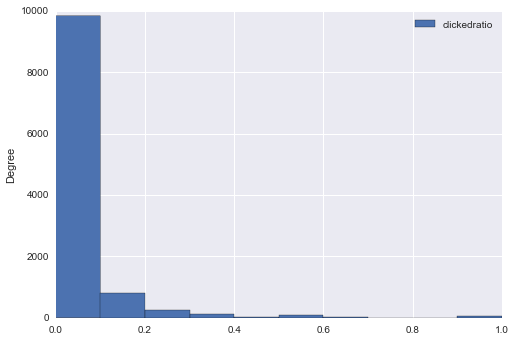

In [158]:
plotCity= df_city.drop(['impression', 'clicked', 'installed'],1).plot(kind='hist')
plt.xticks(df_city.index, df_city_index, rotation='vertical')




AttributeError: 'tuple' object has no attribute 'set_yscale'

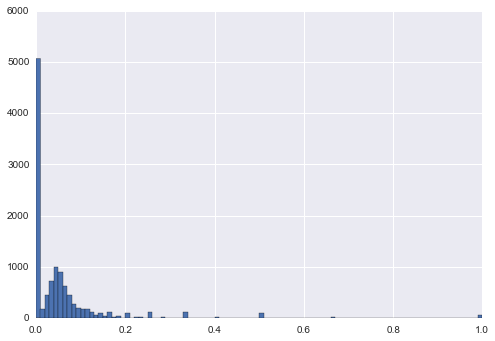

In [165]:
ax=plt.hist(df_city['clickedratio'],bins=100, rwidth=1)
ax.set_yscale('log')


In [170]:
df_city[df_city['clickedratio'] == 0].index

Index([u'100 Mile House', u'150 Mile House', u'70 Mile House', u'Abbott',
       u'Abercrombie', u'Abita Springs', u'Acadia Valley', u'Acampo',
       u'Accord', u'Achille', 
       ...
       u'Zolfo Springs', u'Zortman', u'Zumbrota', u'Zuni', u'Zurich',
       u'Zwingle', u'Zwolle', u'cambridge bay', u'Ãle-aux-noix',
       u'Ãle-perrot'],
      dtype='object', name=u'city', length=5049)

In [181]:
df_5_index=df_city[df_city['impression'] > 5].index
df_5_index

Index([u'100 Mile House', u'Abbeville', u'Aberdeen', u'Abernathy', u'Abilene',
       u'Abingdon', u'Abington', u'Abrams', u'Absecon', u'Accokeek', 
       ...
       u'warman', u'wasaga beach', u'welland', u'whitby', u'windsor',
       u'winnipeg', u'woodbridge', u'yellowknife', u'Ãle-aux-noix',
       u'Ãle-perrot'],
      dtype='object', name=u'city', length=7777)

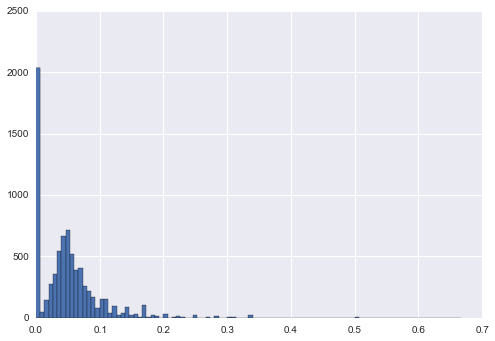

In [175]:
ax=plt.hist(df_5['clickedratio'],bins=100, rwidth=1)

In [168]:
np.mean(df_city['installed'])

0.069017721969899373

In [179]:
df_city;

In [180]:
df_5l=df.drop(df.index[[df_5_index]])

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices